<p style="font-family: Cambria; text-align: center; font-size: 48px;">  I. DATA PRE-PROCESSING</p>

In [4]:
#Importing all the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore", UserWarning)

In [5]:
#Reading the file schema_1_ontario_final
df_schema1=pd.read_csv("schema_1_ontario_final.csv")

In [6]:
#Reading the file schema_2_ontario_final
df_schema2=pd.read_csv("schema_2_ontario_final.csv")

In [7]:
#Reading the file schema_3_ontario_final
df_schema3=pd.read_csv("schema_3_ontario_final.csv")

In [8]:
#combine 3 schema files into a single file
df_combined = pd.concat([df_schema1, df_schema2, df_schema3], ignore_index=True, sort=False)

In [9]:
df_combined.to_csv("covid_python_Dec25_beforecleaning.csv",index=False,encoding="utf-8-sig")

## Renaming age_1 to age_category as this column has age category rather than age

In [10]:
df_combined.rename(columns={'age_1': 'age_category'}, inplace=True)

## After concatenating the three schema files, the columns which are not present in any one of the files has null values.These nulls are set to NR - 'Not Recorded' as these columns were not part of that particular survey response.

In [11]:
df_combined['week'] = df_combined['week'].fillna('NR')
df_combined['month'] = df_combined['month'].fillna('NR')
df_combined['symptoms'] = df_combined['symptoms'].fillna('NR')
df_combined['conditions'] = df_combined['conditions'].fillna('NR')
df_combined['ethnicity'] = df_combined['ethnicity'].fillna('NR')
df_combined['sex'] = df_combined['sex'].fillna('NR')
df_combined['needs'] = df_combined['needs'].fillna('NR')
df_combined['age_category'] = df_combined['age_category'].fillna('NR')
df_combined['contact_in_household'] = df_combined['contact_in_household'].fillna('NR')
df_combined['tested'] = df_combined['tested'].fillna('NR')
df_combined['covid_results_date'] = df_combined['covid_results_date'].fillna('NR')
df_combined['covid_positive'] = df_combined['covid_positive'].fillna('NR')
df_combined['mental_health_impact'] = df_combined['mental_health_impact'].fillna('NR')
df_combined['travel_work_school'] = df_combined['travel_work_school'].fillna('NR')
df_combined['self_isolating'] = df_combined['self_isolating'].fillna('NR')
df_combined['media_channels'] = df_combined['media_channels'].fillna('NR')
df_combined['financial_obligations_impact'] = df_combined['financial_obligations_impact'].fillna('NR')
df_combined['tobacco_usage'] = df_combined['tobacco_usage'].fillna('NR')

## Removing noise in data. 'na' found in the sex column is set to NR

In [12]:
df_combined['sex'] = df_combined['sex'].replace('na', 'NR')

## Removing noise in data. Replace 'n' to negatively in the covid_positive column assuming n means negative

In [13]:
df_combined['covid_positive'] = df_combined['covid_positive'].replace('n', 'negatively')

## For those records over_60 was not recorded, set over_60 to y if age_category '> 65'

In [14]:
df_combined.loc[df_combined['over_60'].isna() & (df_combined['age_category'] == '>65'), 'over_60'] = 'y'

## Create a new column province using the first character of FSA. The first character of FSA is a letter that identifies the province or territory. 

In [15]:
fsa_mapping = {
    'K': 'Eastern Ontario',
    'L': 'Central Ontario',
    'M': 'Metropolitan Toronto',
    'N': 'Southwestern Ontario',
    'P': 'Northern Ontario'
}

df_combined['province'] = df_combined['fsa'].astype(str).str[0].map(fsa_mapping)

## Create a new column region to indicate urban or rural region using second character of FSA. The second character is a numeral that identifies whether the area is urban or rural. A zero indicates a wide-area rural region, while all other digits indicate urban areas.

In [16]:
second_char = df_combined['fsa'].astype(str).str[1]
df_combined['region'] = np.where(second_char == '0', 'Rural', 'Urban')

In [17]:
len(df_combined)

294105

## Create a new column, ethnicity_clean, to separate multiple values in the ethnicity field.


In [18]:
# Cleaning function
# -----------------------------
def clean_ethnicity(value):
    if pd.isna(value):
        return np.nan
    
    value = value.strip().lower()
    
    # Handle missing / non-informative values
    if value in ['nr', 'na', 'not reported', 'not available']:
        return 'NR'
    
    # Split by semicolon first
    value = value.split(';')[0]
    
    # If slash exists (e.g. hispanic/latino), keep first
    #value = value.split('/')[0]
    
    return value.title()

# Apply cleaning
df_combined['ethnicity_clean'] = df_combined['ethnicity'].apply(clean_ethnicity)



## This code uses a mapping dictionary to standardize and clean the travel_work_school column 

In [19]:
# Create a mapping for cleaning
travel_mapping = {
    'NR': 'Not Reported',
    'stoppedTravelling': 'Stopped Traveling',
    'stillTravelEssential': 'Still Travel (Essential)',
    'stillTravelNonEssential': 'Still Travel (Non-Essential)',
    'alwaysWorkFromHome': 'Always Work From Home',
    'didntTravelBefore': 'Did Not Travel Before',
    "non: j'ai toujours travaille de chez moi.": 'Always Work From Home'
}

# Apply the mapping
df_combined['travel_work_school'] = df_combined['travel_work_school'].replace(travel_mapping)


In [20]:
#Write to csv file
df_combined.to_csv("covid_python_Dec25.csv",index=False,encoding="utf-8-sig")

PRESCRIPTIVE ANALYSIS

In [23]:
import pandas as pd

In [27]:
import os
os.getcwd()


'C:\\Users\\scien\\OneDrive\\Documents\\GitHub\\Python_Poineers_Team2'

In [28]:
DATA_PATH = "data/covid_python_Dec25.xlsx"


In [32]:
import os

BASE_DIR = os.getcwd()
print("Current dir:", BASE_DIR)

if BASE_DIR.endswith("notebooks"):
    BASE_DIR = os.path.dirname(BASE_DIR)

DATA_PATH = os.path.join(BASE_DIR, "data", "covid_python_Dec25.xlsx")

print("Looking for:", DATA_PATH)
print("Exists?", os.path.exists(DATA_PATH))


Current dir: C:\Users\scien\OneDrive\Documents\GitHub\Python_Poineers_Team2
Looking for: C:\Users\scien\OneDrive\Documents\GitHub\Python_Poineers_Team2\data\covid_python_Dec25.xlsx
Exists? False


In [33]:
import os

DATA_DIR = os.path.join(BASE_DIR, "data")
print(os.listdir(DATA_DIR))


['cleaned', 'covid_python_Dec25.csv', 'raw']


In [37]:
import pandas as pd
import os

DATA_PATH = os.path.join(BASE_DIR, "data", "covid_python_Dec25.csv")

df = pd.read_csv(DATA_PATH)

print(df.shape)
df.head()


(294105, 32)


C:\Users\scien\AppData\Local\Temp\ipykernel_26532\2794832439.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH)


,week,fsa,probable,vulnerable,is_most_recent,fever_chills_shakes,cough,shortness_of_breath,over_60,any_medical_conditions,...,covid_positive,mental_health_impact,travel_work_school,self_isolating,media_channels,financial_obligations_impact,tobacco_usage,province,region,ethnicity_clean
0,13.0,L4C,n,n,y,n,n,n,n,n,...,NR,NR,Not Reported,NR,NR,NR,NR,Central Ontario,Urban,NR
1,13.0,P1H,y,y,y,n,n,n,y,y,...,NR,NR,Not Reported,NR,NR,NR,NR,Northern Ontario,Urban,NR
2,14.0,N2J,n,y,y,n,n,n,y,n,...,NR,NR,Not Reported,NR,NR,NR,NR,Southwestern Ontario,Urban,NR
3,13.0,N1G,n,n,y,n,n,n,n,n,...,NR,NR,Not Reported,NR,NR,NR,NR,Southwestern Ontario,Urban,NR
4,13.0,M1P,n,y,n,n,n,n,n,y,...,NR,NR,Not Reported,NR,NR,NR,NR,Metropolitan Toronto,Urban,NR


In [39]:
df = pd.read_csv(
    DATA_PATH,
    dtype={"week": "string"},
    low_memory=False
)

print(df.shape)
df.head()


(294105, 32)


,week,fsa,probable,vulnerable,is_most_recent,fever_chills_shakes,cough,shortness_of_breath,over_60,any_medical_conditions,...,covid_positive,mental_health_impact,travel_work_school,self_isolating,media_channels,financial_obligations_impact,tobacco_usage,province,region,ethnicity_clean
0,13.0,L4C,n,n,y,n,n,n,n,n,...,NR,NR,Not Reported,NR,NR,NR,NR,Central Ontario,Urban,NR
1,13.0,P1H,y,y,y,n,n,n,y,y,...,NR,NR,Not Reported,NR,NR,NR,NR,Northern Ontario,Urban,NR
2,14.0,N2J,n,y,y,n,n,n,y,n,...,NR,NR,Not Reported,NR,NR,NR,NR,Southwestern Ontario,Urban,NR
3,13.0,N1G,n,n,y,n,n,n,n,n,...,NR,NR,Not Reported,NR,NR,NR,NR,Southwestern Ontario,Urban,NR
4,13.0,M1P,n,y,n,n,n,n,n,y,...,NR,NR,Not Reported,NR,NR,NR,NR,Metropolitan Toronto,Urban,NR


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294105 entries, 0 to 294104
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   week                          294105 non-null  string
 1   fsa                           294105 non-null  object
 2   probable                      294105 non-null  object
 3   vulnerable                    294105 non-null  object
 4   is_most_recent                278571 non-null  object
 5   fever_chills_shakes           294105 non-null  object
 6   cough                         294105 non-null  object
 7   shortness_of_breath           294105 non-null  object
 8   over_60                       267013 non-null  object
 9   any_medical_conditions        294105 non-null  object
 10  travel_outside_canada         294105 non-null  object
 11  contact_with_illness          294105 non-null  object
 12  symptoms                      294105 non-null  object
 13 

PRESCRIPTIVE ANALYSIS

In [41]:
import os, re
import numpy as np
import pandas as pd

In [42]:
#Load File
BASE_DIR = os.getcwd()
if BASE_DIR.endswith("notebooks"):
    BASE_DIR = os.path.dirname(BASE_DIR)

DATA_PATH = os.path.join(BASE_DIR, "data", "covid_python_Dec25.csv")

df = pd.read_csv(DATA_PATH, dtype={"week": "string"}, low_memory=False)

# Treat "NR" as missing for analysis (very important)
df = df.replace({"NR": pd.NA, "": pd.NA})

print("Loaded:", df.shape)
print(df.columns.tolist())

Loaded: (294105, 32)
['week', 'fsa', 'probable', 'vulnerable', 'is_most_recent', 'fever_chills_shakes', 'cough', 'shortness_of_breath', 'over_60', 'any_medical_conditions', 'travel_outside_canada', 'contact_with_illness', 'symptoms', 'conditions', 'ethnicity', 'sex', 'needs', 'age_category', 'month', 'contact_in_household', 'tested', 'covid_results_date', 'covid_positive', 'mental_health_impact', 'travel_work_school', 'self_isolating', 'media_channels', 'financial_obligations_impact', 'tobacco_usage', 'province', 'region', 'ethnicity_clean']


In [43]:
# 1. Marker groups definition
MARKER_GROUPS = {
    "clinical_flags": [
        "fever_chills_shakes", "cough", "shortness_of_breath"
    ],
    "vulnerability_flags": [
        "over_60", "any_medical_conditions"
    ],
    "exposure_flags": [
        "travel_outside_canada", "contact_with_illness", "contact_in_household"
    ],
    "behavior_flags": [
        "tested", "self_isolating"
    ],
    # multi-select groups (expanded into markers)
    "multiselect": {
        "symptoms": "sym",
        "conditions": "cond",
        "media_channels": "media",
        "financial_obligations_impact": "fin"
    },
    # outcome variables
    "outcomes": ["probable", "vulnerable", "covid_positive"]
}

In [44]:
import pandas as pd
import numpy as np

YN_COLS = [
    "probable", "vulnerable", "tested", "self_isolating",
    "fever_chills_shakes", "cough", "shortness_of_breath",
    "over_60", "any_medical_conditions",
    "travel_outside_canada", "contact_with_illness",
    "contact_in_household"
]

def yn_to_int(x):
    if pd.isna(x): return np.nan
    x = str(x).lower().strip()
    return 1 if x == "y" else 0 if x == "n" else np.nan

for c in YN_COLS:
    df[c] = df[c].apply(yn_to_int)


In [45]:
#1. Which reported symptoms are most strongly associated with being classified as a probable COVID case?
# Expand Multi-Select Marker Columns
import re

def normalize(tok):
    return re.sub(r"[^a-z0-9]+", "_", tok.lower()).strip("_")

def split_multi(x):
    if pd.isna(x): return []
    return [t.strip() for t in str(x).split(";")]

def expand_multiselect(df, col, prefix):
    tokens = set()
    for v in df[col].dropna():
        tokens.update(split_multi(v))

    cols = []
    for t in sorted(tokens):
        c = f"{prefix}__{normalize(t)}"
        df[c] = df[col].apply(lambda x: 1 if t in split_multi(x) else 0)
        cols.append(c)
    return cols

symptom_cols = expand_multiselect(df, "symptoms", "sym")
condition_cols = expand_multiselect(df, "conditions", "cond")

marker_cols = symptom_cols + condition_cols


In [56]:
# Correlation Analysis
corr_df = (
    pd.DataFrame({
        "marker": marker_cols,
        "corr_with_probable": [
            round(phi_corr(df[m], df["probable"]), 2)
            for m in marker_cols
        ]
            })
    .dropna()
    .sort_values("corr_with_probable", ascending=False)
)

corr_df.head(10)


,marker,corr_with_probable
4,sym__fever,0.08
1,sym__cough,0.05
0,sym__chills,0.04
9,sym__shakes,0.04
10,sym__shortnessofbreath,0.04
5,sym__lossofsmelltaste,0.03
11,sym__sorethroat,0.02
2,sym__diarrhea,0.02
3,sym__diarrhee,0.01
7,sym__other,0.01


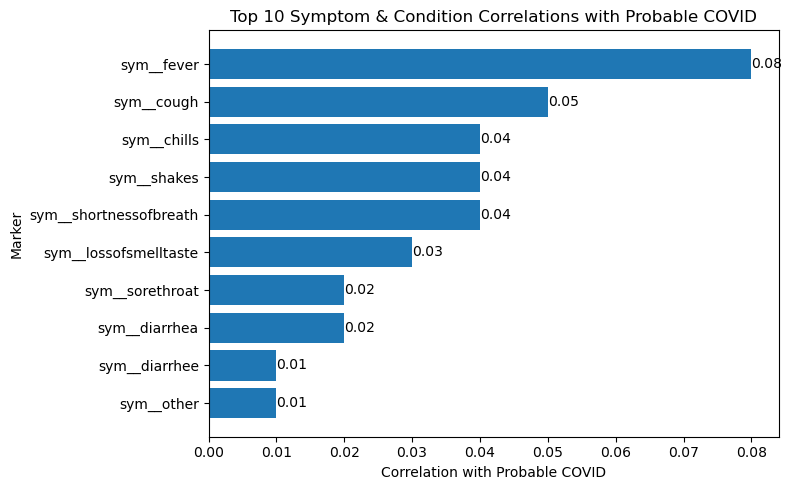

In [59]:
# 1.Top Correlated Markers with Probable COVID
import matplotlib.pyplot as plt

# Select top 10 correlated markers
top_corr = corr_df.head(10)

plt.figure(figsize=(8, 5))
plt.barh(
    top_corr["marker"],
    top_corr["corr_with_probable"]
)

plt.xlabel("Correlation with Probable COVID")
plt.ylabel("Marker")
plt.title("Top 10 Symptom & Condition Correlations with Probable COVID")

# Highest correlation at the top
plt.gca().invert_yaxis()

# Add value labels on bars
for index, value in enumerate(top_corr["corr_with_probable"]):
    plt.text(value, index, f"{value}", va="center", ha="left")

plt.tight_layout()
plt.show()


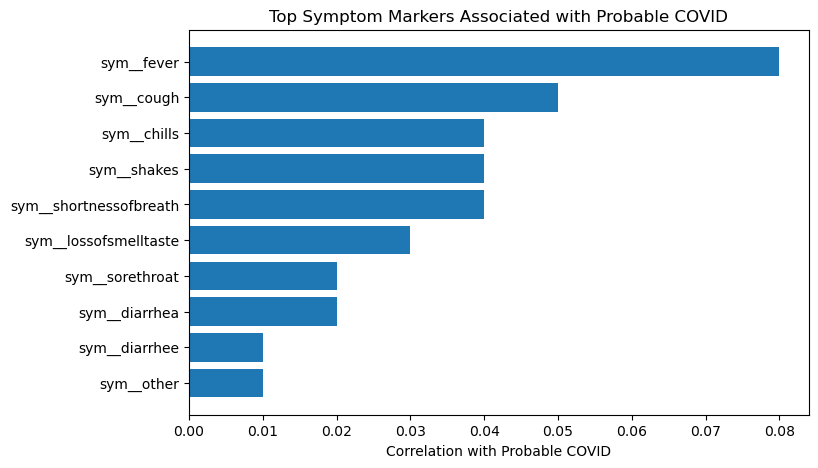

In [66]:
import matplotlib.pyplot as plt

top_corr = corr_df.head(10)

plt.figure(figsize=(8,5))
plt.barh(top_corr["marker"], top_corr["corr_with_probable"])
plt.xlabel("Correlation with Probable COVID")
plt.title("Top Symptom Markers Associated with Probable COVID")
plt.gca().invert_yaxis()
plt.show()


In [64]:
# Risk Lift (Prescriptive Metric)
def risk_lift(df, marker, outcome="probable"):
    tmp = df[[marker, outcome]].dropna()
    rate1 = tmp[tmp[marker]==1][outcome].mean()
    rate0 = tmp[tmp[marker]==0][outcome].mean()
    return rate1 - rate0

lift_df = pd.DataFrame({
    "marker": marker_cols,
    "risk_lift": [risk_lift(df, m) for m in marker_cols]
}).dropna().sort_values("risk_lift", ascending=False)

lift_df.head(10)


,marker,risk_lift
3,sym__diarrhee,0.955601
14,cond__antecedents_davc,0.955601
4,sym__fever,0.503127
23,cond__lhypertension,0.455601
9,sym__shakes,0.434403
5,sym__lossofsmelltaste,0.332164
0,sym__chills,0.248923
1,sym__cough,0.217659
10,sym__shortnessofbreath,0.211826
7,sym__other,0.112287


In [62]:
# create lift_df
lift_results = []

baseline_risk = df["probable"].mean()

for m in marker_cols:
    tmp = df[[m, "probable"]].dropna()
    
    # Only compute if marker appears enough times
    if tmp[m].sum() < 20:
        continue
        
    risk_with_marker = tmp.loc[tmp[m] == 1, "probable"].mean()
    lift = risk_with_marker / baseline_risk
    
    lift_results.append({
        "marker": m,
        "risk_lift": round(lift, 2)
    })

lift_df = (
    pd.DataFrame(lift_results)
    .sort_values("risk_lift", ascending=False)
)


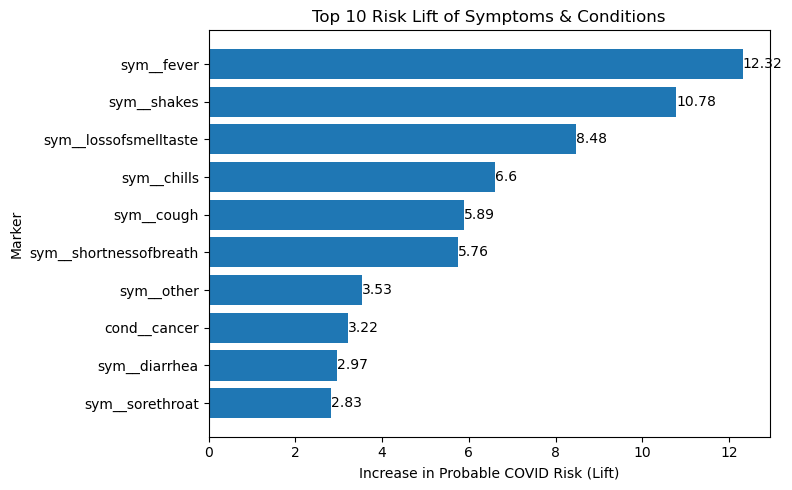

In [63]:
import matplotlib.pyplot as plt

top_lift = lift_df.head(10)

plt.figure(figsize=(8, 5))
plt.barh(top_lift["marker"], top_lift["c -risk_lift"])

plt.xlabel("Increase in Probable COVID Risk (Lift)")
plt.ylabel("Marker")
plt.title("Top 10 Risk Lift of Symptoms & Conditions")

plt.gca().invert_yaxis()

# Add value labels
for i, v in enumerate(top_lift["risk_lift"]):
    plt.text(v, i, f"{v}", va="center")

plt.tight_layout()
plt.show()


In [1]:
top_gap = gap_df.head(10)

plt.figure()
plt.barh(top_gap["marker"], top_gap["difference"])
plt.xlabel("Higher Prevalence in Non-Isolating Group")
plt.title("Markers Driving Failure to Self-Isolate")
plt.gca().invert_yaxis()
plt.show()


NameError: name 'gap_df' is not defined

In [67]:
# correlation analysis
def phi_corr(x, y):
    tmp = pd.concat([x, y], axis=1).dropna()
    if tmp.shape[0] < 50:
        return np.nan
    return tmp.iloc[:, 0].corr(tmp.iloc[:, 1])

corr_df = (
    pd.DataFrame({
        "marker": marker_cols,
        "corr_with_probable": [phi_corr(df[m], df["probable"]) for m in marker_cols]
    })
    .dropna()
    .assign(corr_with_probable=lambda d: d["corr_with_probable"].round(2))
    .sort_values("corr_with_probable", ascending=False)
    .reset_index(drop=True)
)

corr_df.head(10)


,marker,corr_with_probable
0,sym__fever,0.08
1,sym__cough,0.05
2,sym__chills,0.04
3,sym__shakes,0.04
4,sym__shortnessofbreath,0.04
5,sym__lossofsmelltaste,0.03
6,sym__sorethroat,0.02
7,sym__diarrhea,0.02
8,sym__diarrhee,0.01
9,sym__other,0.01


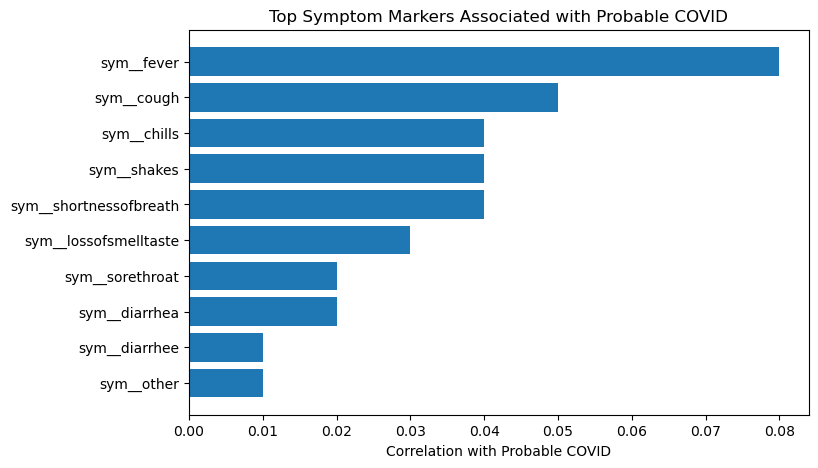

In [68]:
#Q1: Top symptoms correlation
import matplotlib.pyplot as plt

top_corr = corr_df.head(10)

plt.figure(figsize=(8,5))
plt.barh(top_corr["marker"], top_corr["corr_with_probable"])
plt.xlabel("Correlation with Probable COVID")
plt.title("Top Symptom Markers Associated with Probable COVID")
plt.gca().invert_yaxis()
plt.show()

#Symptoms like fever, cough, chills, and shortness of breath should be prioritized as triggers for testing and isolation guidance.

In [69]:
#Risk Lift Analysis (How much does risk increase?)
def risk_lift(df, marker, outcome="probable"):
    tmp = df[[marker, outcome]].dropna()
    rate1 = tmp[tmp[marker]==1][outcome].mean()
    rate0 = tmp[tmp[marker]==0][outcome].mean()
    return rate1 - rate0

lift_df = (
    pd.DataFrame({
        "marker": marker_cols,
        "risk_lift": [risk_lift(df, m) for m in marker_cols]
    })
    .dropna()
    .assign(risk_lift=lambda d: d["risk_lift"].round(2))
    .sort_values("risk_lift", ascending=False)
    .reset_index(drop=True)
)

lift_df.head(10)


,marker,risk_lift
0,sym__diarrhee,0.96
1,cond__antecedents_davc,0.96
2,sym__fever,0.50
3,cond__lhypertension,0.46
4,sym__shakes,0.43
5,sym__lossofsmelltaste,0.33
6,sym__chills,0.25
7,sym__cough,0.22
8,sym__shortnessofbreath,0.21
9,sym__other,0.11


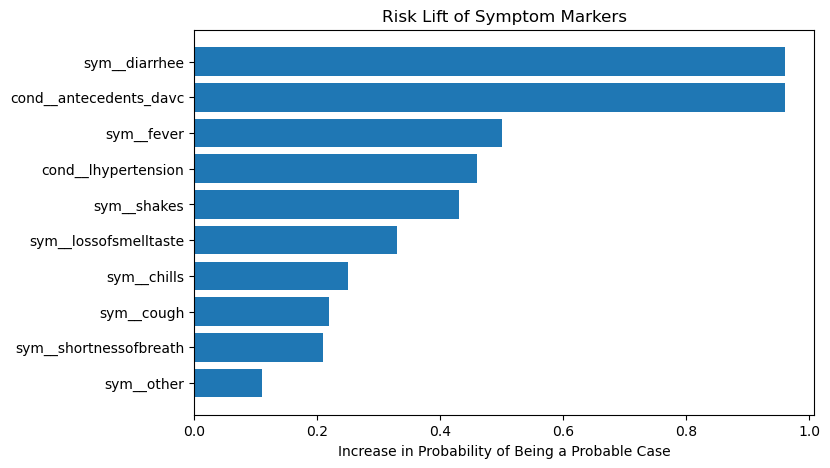

In [72]:
#Q2:Which symptom markers should be prioritized for screening because they most increase probable COVID risk?
top_lift = lift_df.head(10)

plt.figure(figsize=(8,5))
plt.barh(top_lift["marker"], top_lift["risk_lift"])
plt.xlabel("Increase in Probability of Being a Probable Case")
plt.title("Risk Lift of Symptom Markers")
plt.gca().invert_yaxis()
plt.show()

# These markers increase risk, not just correlate—making them ideal for action rules.

In [73]:
# Gap Analysis (Who is not complying?)
gap = df[(df["probable"] == 1) & (df["self_isolating"] == 0)]
baseline = df[df["probable"] == 1]

gap_df = pd.DataFrame({
    "marker": marker_cols,
    "gap_difference": [
        gap[m].mean() - baseline[m].mean() for m in marker_cols
    ]
}).dropna().sort_values("gap_difference", ascending=False)

gap_df.head(10)


,marker,gap_difference
1,sym__cough,0.248079
4,sym__fever,0.247237
11,sym__sorethroat,0.212191
5,sym__lossofsmelltaste,0.145698
0,sym__chills,0.139801
12,sym__stomachpaincramps,0.109426
9,sym__shakes,0.106823
2,sym__diarrhea,0.105674
10,sym__shortnessofbreath,0.102841
8,sym__runnynose,0.066034


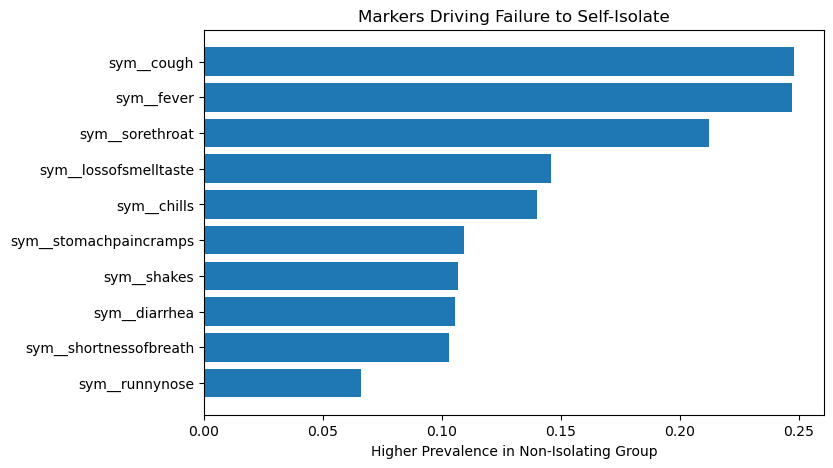

In [75]:
#Q3: Drivers of Non-Isolation
top_gap = gap_df.head(10)

plt.figure(figsize=(8,5))
plt.barh(top_gap["marker"], top_gap["gap_difference"])
plt.xlabel("Higher Prevalence in Non-Isolating Group")
plt.title("Markers Driving Failure to Self-Isolate")
plt.gca().invert_yaxis()
plt.show()

# These markers identify where intervention is failing, guiding targeted outreach.

In [6]:
import matplotlib.pyplot as plt

# Select top symptom correlations
top_symptoms = corr_df.head(10)

plt.figure(figsize=(8,5))
plt.barh(
    top_symptoms["marker"],
    top_symptoms["corr_with_probable"]
)

plt.xlabel("Correlation with Probable COVID")
plt.ylabel("Symptom Marker")
plt.title("Symptoms Most Strongly Associated with Probable COVID")

plt.gca().invert_yaxis()  # highest correlation on top
plt.tight_layout()
plt.show()


NameError: name 'corr_df' is not defined

In [8]:
# Q4.Does contact with illness or household exposure significantly increase probable cases?
import matplotlib.pyplot as plt

# Calculate probable COVID rate by exposure status
exposure_cols = ["contact_with_illness", "contact_in_household"]

exposure_results = []

for col in exposure_cols:
    rate_exposed = df[df[col] == 1]["probable"].mean()
    rate_not_exposed = df[df[col] == 0]["probable"].mean()
    exposure_results.append([col, rate_exposed, rate_not_exposed])

exposure_df = pd.DataFrame(
    exposure_results,
    columns=["Exposure_Type", "Probable_If_Exposed", "Probable_If_Not_Exposed"]
)

exposure_df


NameError: name 'df' is not defined

In [79]:
exposure_df = (
    exposure_df
    .assign(
        Probable_If_Exposed=lambda d: d["Probable_If_Exposed"].round(2),
        Probable_If_Not_Exposed=lambda d: d["Probable_If_Not_Exposed"].round(2)
    )
)

exposure_df


,Exposure_Type,Probable_If_Exposed,Probable_If_Not_Exposed
0,contact_with_illness,1.00,0.02
1,contact_in_household,0.94,0.92


In [11]:
# Select only medical condition markers
condition_markers = [c for c in df.columns if c.startswith("cond__")]

def phi_corr(x, y):
    tmp = pd.concat([x, y], axis=1).dropna()
    if tmp.shape[0] < 50:
        return np.nan
    return tmp.iloc[:, 0].corr(tmp.iloc[:, 1])

cond_corr_df = (
    pd.DataFrame({
        "condition": condition_markers,
        "corr_with_vulnerable": [
            phi_corr(df[c], df["vulnerable"]) for c in condition_markers
        ]
    })
    .dropna()
    .assign(corr_with_vulnerable=lambda d: d["corr_with_vulnerable"].round(2))
    .sort_values("corr_with_vulnerable", ascending=False)
    .reset_index(drop=True)
)

cond_corr_df.head(10)


NameError: name 'df' is not defined

In [9]:
#Q5.	Which medical conditions are most associated with vulnerability status?
import matplotlib.pyplot as plt

#top_conditions = cond_corr_df.head(10).copy()

top_conditions = cond_corr_df.head(10)

# Clean labels for presentation
top_conditions["clean_condition"] = (
    top_conditions["condition"]
    .str.replace("cond__", "", regex=False)
    .str.replace("_", " ")
    .str.title()
)

plt.figure(figsize=(9,5))
plt.barh(
    top_conditions["clean_condition"],
    top_conditions["corr_with_vulnerable"]
)

plt.xlabel("Correlation with Vulnerability Status")
plt.ylabel("Medical Condition")
plt.title("Medical Conditions Most Associated with Vulnerability")
plt.gca().invert_yaxis()

# Add value labels (2 decimals)
for i, v in enumerate(top_conditions["corr_with_vulnerable"]):
    plt.text(v, i, f"{v:.2f}", va="center")

plt.tight_layout()
plt.show()


NameError: name 'cond_corr_df' is not defined

In [82]:
# Calculate rates by age group
age_df = pd.DataFrame({
    "Age_Group": ["Over 60", "Under 60"],
    "Probable_COVID_Rate": [
        df[df["over_60"] == 1]["probable"].mean(),
        df[df["over_60"] == 0]["probable"].mean()
    ],
    "Vulnerable_Rate": [
        df[df["over_60"] == 1]["vulnerable"].mean(),
        df[df["over_60"] == 0]["vulnerable"].mean()
    ]
})

# Round to 2 decimals
age_df[["Probable_COVID_Rate", "Vulnerable_Rate"]] = (
    age_df[["Probable_COVID_Rate", "Vulnerable_Rate"]].round(2)
)

age_df


,Age_Group,Probable_COVID_Rate,Vulnerable_Rate
0,Over 60,0.04,1.00
1,Under 60,0.05,0.14


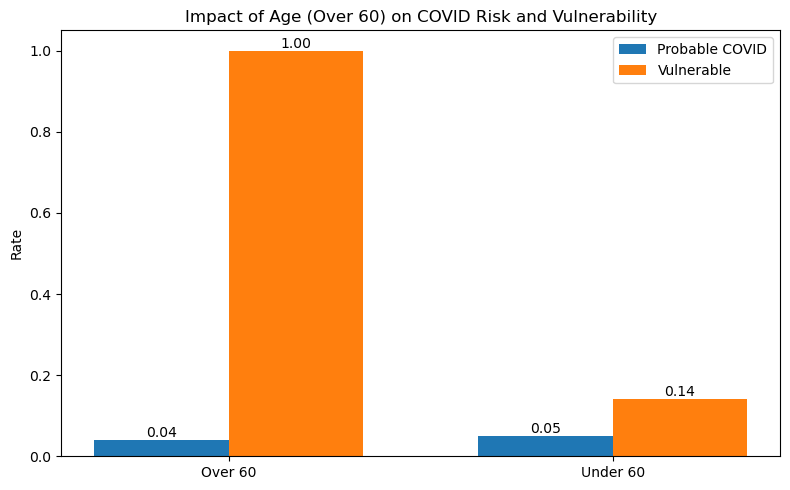

In [83]:
#Q6: Should individuals over 60 be prioritized differently for intervention?
import matplotlib.pyplot as plt
import numpy as np

labels = age_df["Age_Group"]
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,5))

plt.bar(x - width/2, age_df["Probable_COVID_Rate"], width, label="Probable COVID")
plt.bar(x + width/2, age_df["Vulnerable_Rate"], width, label="Vulnerable")

plt.xticks(x, labels)
plt.ylabel("Rate")
plt.title("Impact of Age (Over 60) on COVID Risk and Vulnerability")
plt.legend()

# Add value labels
for i in range(len(labels)):
    plt.text(x[i] - width/2, age_df["Probable_COVID_Rate"][i],
             f'{age_df["Probable_COVID_Rate"][i]:.2f}', ha='center', va='bottom')
    plt.text(x[i] + width/2, age_df["Vulnerable_Rate"][i],
             f'{age_df["Vulnerable_Rate"][i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [84]:
# Filter to probable cases only
probable_df = df[df["probable"] == 1].copy()


In [85]:
#prepare data
groups = [
    "over_60",
    "any_medical_conditions",
    "contact_with_illness",
    "contact_in_household"
]

heatmap_data = []

for g in groups:
    rate_not_tested = probable_df[probable_df[g] == 1]["tested"].eq(0).mean()
    heatmap_data.append(rate_not_tested)

heatmap_df = pd.DataFrame(
    [heatmap_data],
    columns=[g.replace("_", " ").title() for g in groups],
    index=["Not Tested Rate"]
).round(2)

heatmap_df


,Over 60,Any Medical Conditions,Contact With Illness,Contact In Household
Not Tested Rate,0.0,0.03,0.02,0.78


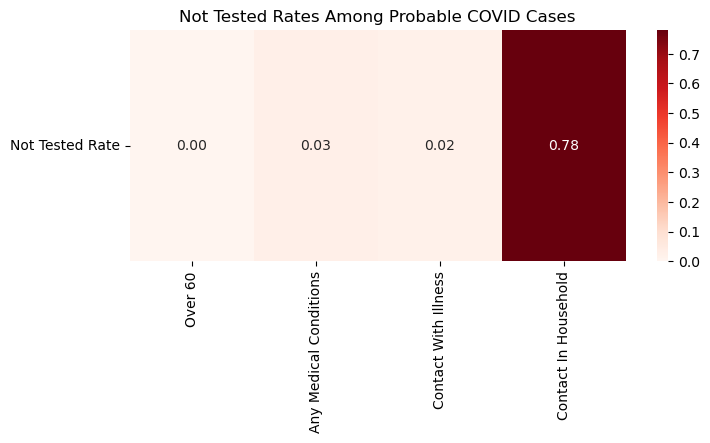

In [86]:
# Q7.7.	Among probable cases, which groups are not getting tested?
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3))
sns.heatmap(
    heatmap_df,
    annot=True,
    cmap="Reds",
    fmt=".2f"
)

plt.title("Not Tested Rates Among Probable COVID Cases")
plt.yticks(rotation=0)
plt.show()


In [87]:
# prepare data
# Filter probable cases
probable_df = df[df["probable"] == 1].copy()

# Define marker groups to evaluate
markers = [
    "over_60",
    "any_medical_conditions",
    "contact_with_illness",
    "contact_in_household"
]

# Gap calculation
gap_results = []

for m in markers:
    not_iso_rate = probable_df[probable_df["self_isolating"] == 0][m].mean()
    baseline_rate = probable_df[m].mean()
    gap_results.append([
        m.replace("_", " ").title(),
        round(not_iso_rate, 2),
        round(baseline_rate, 2),
        round(not_iso_rate - baseline_rate, 2)
    ])

gap_df = pd.DataFrame(
    gap_results,
    columns=[
        "Marker",
        "Not_Isolating_Rate",
        "Baseline_Probable_Rate",
        "Difference"
    ]
)

gap_df


,Marker,Not_Isolating_Rate,Baseline_Probable_Rate,Difference
0,Over 60,1.00,0.15,0.85
1,Any Medical Conditions,1.00,0.34,0.66
2,Contact With Illness,0.74,0.54,0.20
3,Contact In Household,0.40,0.50,-0.10


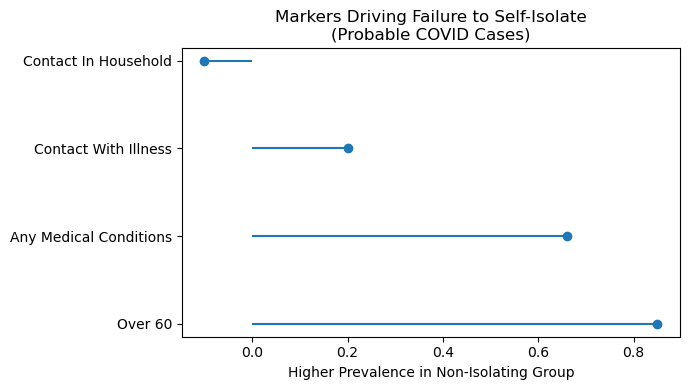

In [88]:
# Q8.	Among probable cases, which markers are associated with failure to self-isolate?
plt.figure(figsize=(7,4))

plt.hlines(
    y=gap_df["Marker"],
    xmin=0,
    xmax=gap_df["Difference"]
)

plt.plot(
    gap_df["Difference"],
    gap_df["Marker"],
    "o"
)

plt.xlabel("Higher Prevalence in Non-Isolating Group")
plt.title("Markers Driving Failure to Self-Isolate\n(Probable COVID Cases)")
plt.tight_layout()
plt.show()
